<a href="https://colab.research.google.com/github/2303a52176yeruva/explainable-ai-lab-assignment/blob/main/2303a52176_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***2303a52176***


Rishwanth Reddy

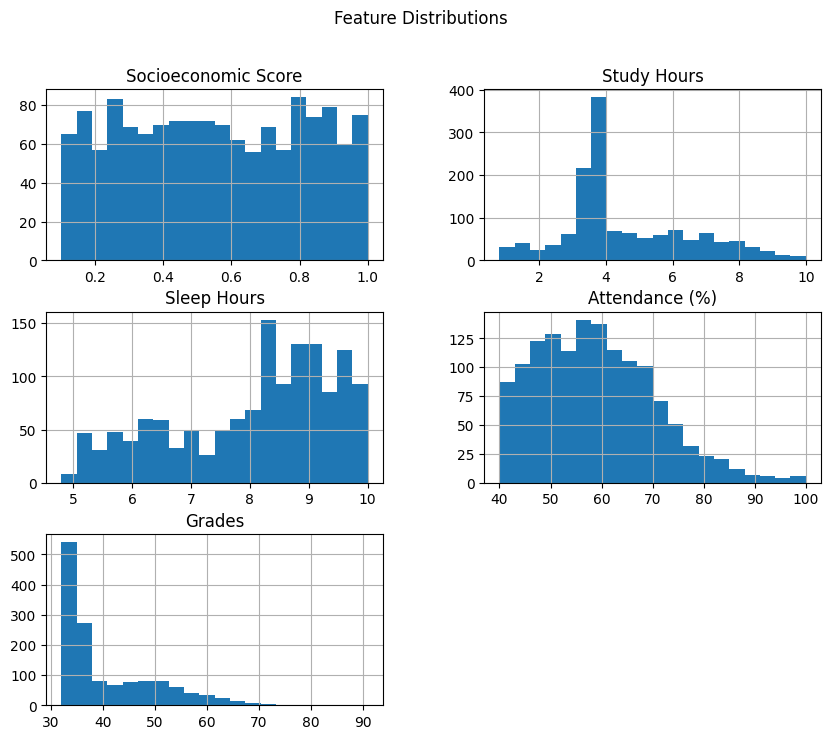

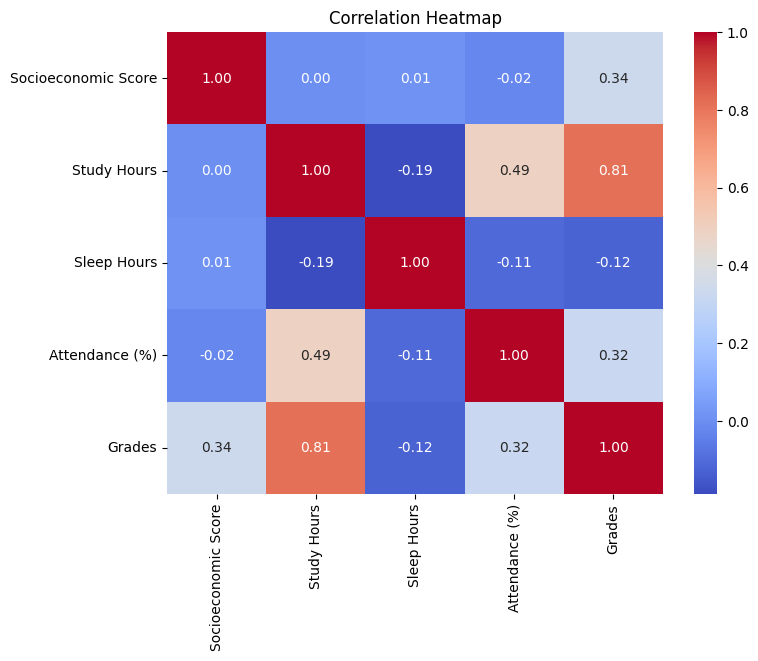

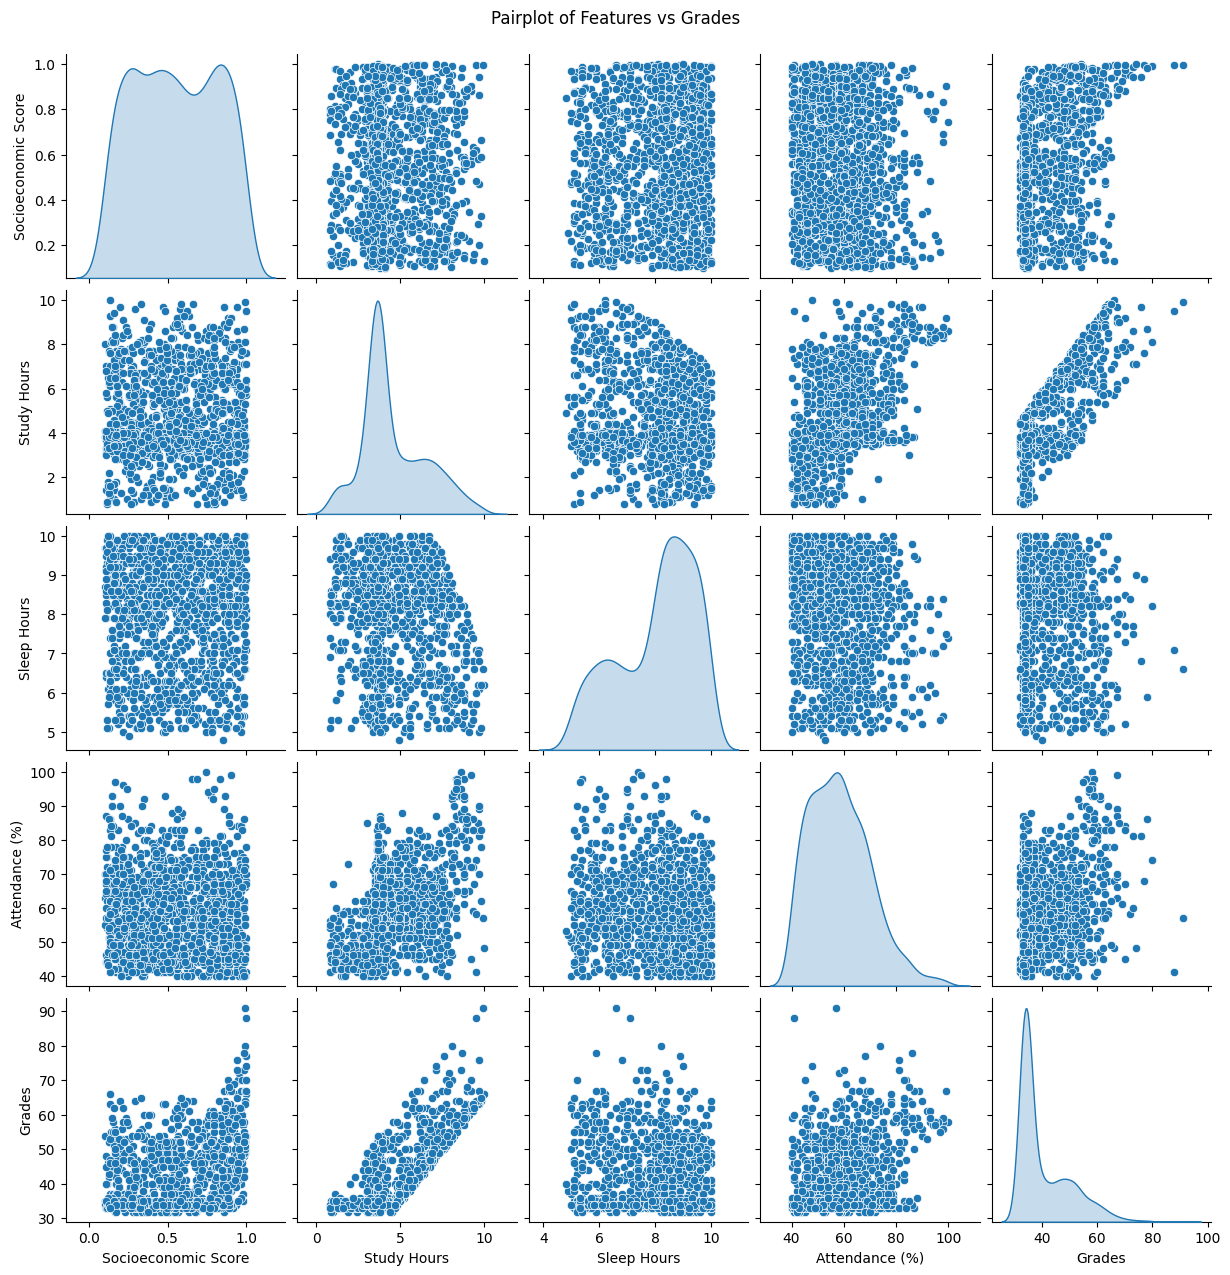

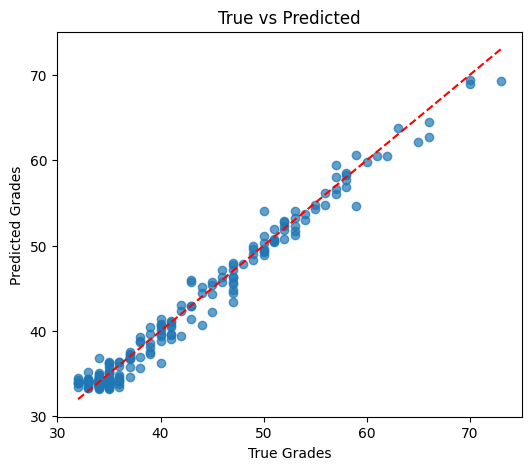

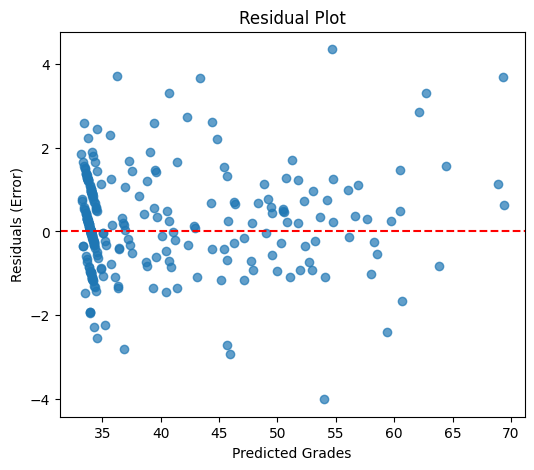

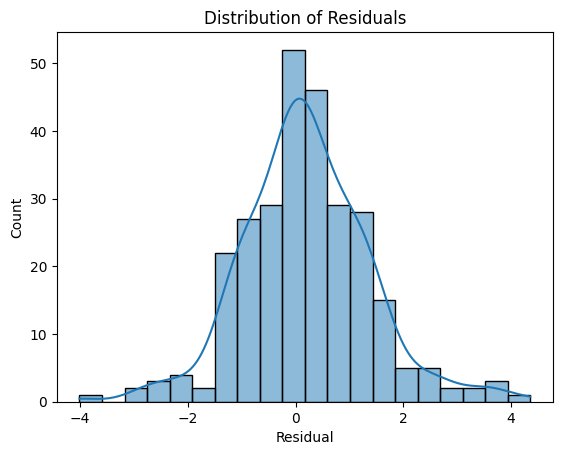

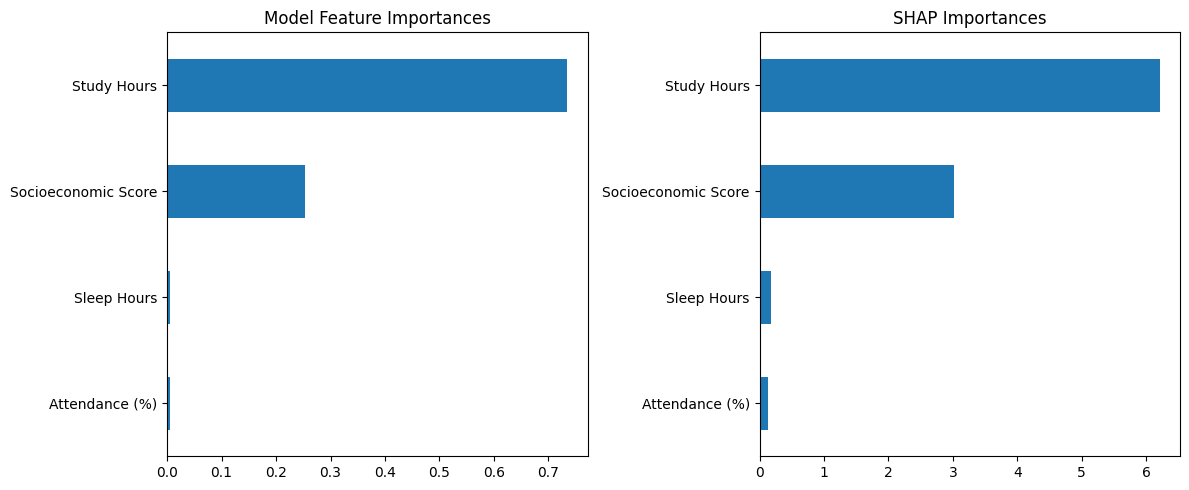

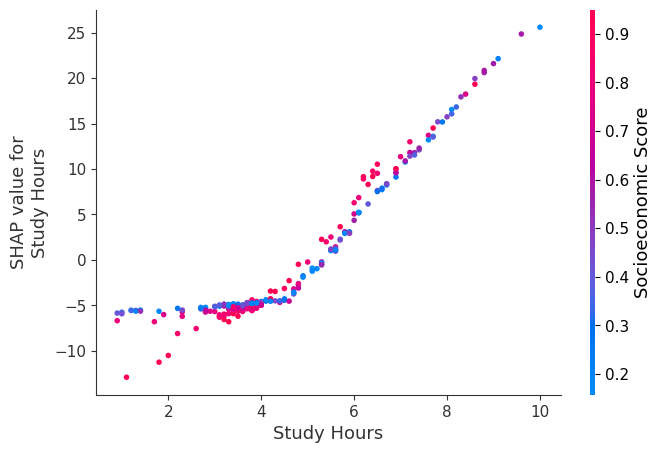

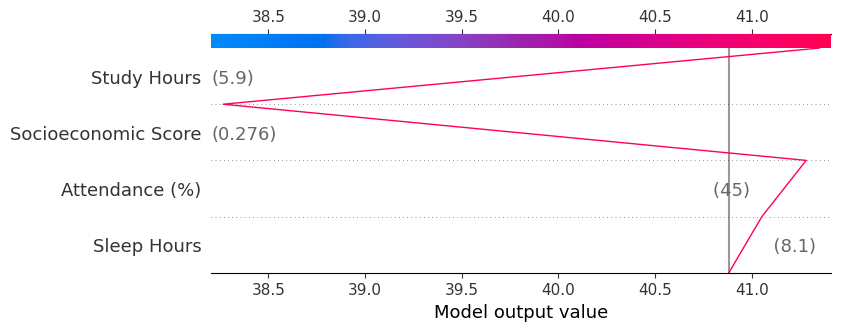

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import numpy as np
import pandas as pd

# 1. Feature Distributions
df.hist(figsize=(10,8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3. Pairplot (features vs Grades)
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairplot of Features vs Grades", y=1.02)
plt.show()

# 4. True vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Grades")
plt.ylabel("Predicted Grades")
plt.title("True vs Predicted")
plt.show()

# 5. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Grades")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()

# 6. Residual Distribution
sns.histplot(residuals, kde=True, bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()

# 7. Compare SHAP vs Model Importances
rf_importances = pd.Series(model.feature_importances_, index=X.columns)
shap_importance = np.abs(shap_values).mean(axis=0)
shap_importances = pd.Series(shap_importance, index=X.columns)

fig, ax = plt.subplots(1,2, figsize=(12,5))
rf_importances.sort_values().plot(kind="barh", ax=ax[0], title="Model Feature Importances")
shap_importances.sort_values().plot(kind="barh", ax=ax[1], title="SHAP Importances")
plt.tight_layout()
plt.show()

# 8. SHAP Dependence Plot (example: Study Hours)
shap.dependence_plot("Study Hours", shap_values, X_test)

# 9. SHAP Decision Plot (first prediction)
shap.decision_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])
